<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

**<center><h3>Ensemble Learning Assignment Problem</h3></center>**

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Problem Statement**
---
- **Medilet** a cancer research institute is working on a project related to breast cancer.

- They have collected data regarding **tumor lumps** inside the breast but they are **uncertain** about the type of tumor.

- They have hired a team of data scientists. Consider you are one of them...


---
<a name = Section2></a>
# **2. Objective**
---

- The objective of this assignment is to **predict** if the tumor is Benign or Malignant.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [2]:
!pip install -q datascience                                                       # Package that is required by pandas profiling
!pip install -q pandas-profiling  

ERROR: Invalid requirement: '#'


In [3]:
!pip install mlxtend

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.



In [4]:
!pip install -q --upgrade pandas-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [5]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                    # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
import string                                                                     # For string related operations
import pprint                                                                     # For printing of Collections line by line
from collections import Counter                                                   # For estimating frequency
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve, accuracy_score                 # For precision and recall metric estimation
from sklearn.metrics import classification_report                                 # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix, roc_auc_score                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.     
from sklearn.ensemble import RandomForestClassifier, VotingClassifier             # Loading differernt ensemble models
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier                 # Loading differernt ensemble models
from sklearn.tree import DecisionTreeClassifier                                   # Loading decision tree classifier from tree
from sklearn.svm import SVC                                                       # Loading SVM from  Sklearn
from sklearn.linear_model import LogisticRegression                               # Loading Logistic regression from linear model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                            
from sklearn.model_selection import cross_val_score                               # Importing cross validation score from model selection
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

C:\Users\10011487\AppData\Local\Temp\ipykernel_15100\2440167476.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis)


---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset has been provided by Medilet, a research institute and it can be retrieved from the attached <a href = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data">**link**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 	699 | 11 | 	88.2 B| 

</br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**Sample code number**| Unique code for each sample.|
|02|**Clump Thickness**|Benign cells tend to be grouped in monolayers, while cancerous cells are often grouped in multilayers.|
|03|**Uniformity of Cell Size**|Cancer cells tend to vary in size and shape.|
|04|**Uniformity of Cell Shape**| Cancer cells tend to vary in size and shape.|
|05|**Marginal Adhesion**|Normal cells tend to stick together. Cancer cells tend to lose this ability. So the loss of adhesion is a sign of malignancy.|
|06|**Single Epithelial Cell Size**| Epithelial cells that are significantly enlarged may be a malignant cell.|
|07|**Bare Nuclei**|This is a term used for nuclei not surrounded by cytoplasm (the rest of the cell). Those are typically seen in benign tumors.|
|08|**Bland Chromatin**|Describes a uniform "texture" of the nucleus seen in benign cells. In cancer cells, the chromatin tends to be more coarse.|
|08|**Normal Nucleoli**|In cancer cells, the nucleoli become more prominent, and sometimes there are more of them.|
|09|**Mitosis**|Cancer is essentially a disease of uncontrolled mitosis.|
|10|**Class**| Benign (non-cancerous) or malignant (cancerous) lump in a breast.|


In [6]:
 data = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                    names=['Sample code number', 'Clump Thickness','Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 
                           'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin', 'Normal Nucleoli', 'Mitosis','Class'])
print('Data Shape:', data.shape)
data.head()

Data Shape: (699, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [7]:
data.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitosis,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitosis                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [9]:
profile = ProfileReport(df=data)
profile.to_file(output_file='20230201_ELAssignment_PrePR.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [10]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

---
**<h4>Question 1:** Create a function that drops the redundant rows and displays the frequency of final rows.</h4>

---
- You can plot the frequency distribution and proportion using seaborn countplot function.

In [11]:
def drop_duplicate_data(data):
    data.drop_duplicates(inplace = True)

In [12]:
drop_duplicate_data(data)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           691 non-null    int64 
 1   Clump Thickness              691 non-null    int64 
 2   Uniformity of Cell Size      691 non-null    int64 
 3   Uniformity of Cell Shape     691 non-null    int64 
 4   Marginal Adhesion            691 non-null    int64 
 5   Single Epithelial Cell Size  691 non-null    int64 
 6   Bare Nuclei                  691 non-null    object
 7   Bland Chromatin              691 non-null    int64 
 8   Normal Nucleoli              691 non-null    int64 
 9   Mitosis                      691 non-null    int64 
 10  Class                        691 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.8+ KB


---
**<h4>Question 2:** Create a function that drops **Sample code number** feature  from the dataset.</h4>

---

In [14]:
def drop_features(data):
    data.drop("Sample code number", axis = 'columns', inplace = True)

In [15]:
drop_features(data)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


---
**<h4>Question 6:** Create a function to replace '?' in 'Bare Nuclei' with 0 ? </h4>

---

- Print the unique values in 'Bare Nuclei' after the opreation is performed.

In [16]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [17]:
data_test = data

In [18]:
data_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [19]:
def replace_unwanted(data_test):
    data_test['Bare Nuclei'] = np.where(data_test['Bare Nuclei'] != '?', data_test['Bare Nuclei'], 0)

In [20]:
replace_unwanted(data_test)

In [21]:
data_test['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 0, '5', '8', '6'], dtype=object)

In [22]:
data_test['Bare Nuclei'].value_counts()

1     397
10    130
2      30
5      30
3      28
8      20
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [23]:
data['Bare Nuclei'].value_counts()

1     397
10    130
2      30
5      30
3      28
8      20
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [24]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', 0, '5', '8', '6'], dtype=object)

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 3:** Create a function that displays the frequency of Malignant and Benign tumors in the class column?</h4>

---
- You can plot the frequency distribution using seaborn countplot function.

- You can also add proportions onto your plot.

In [25]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [26]:
def plot_class(data):
    sns.countplot(x = data['Class'])

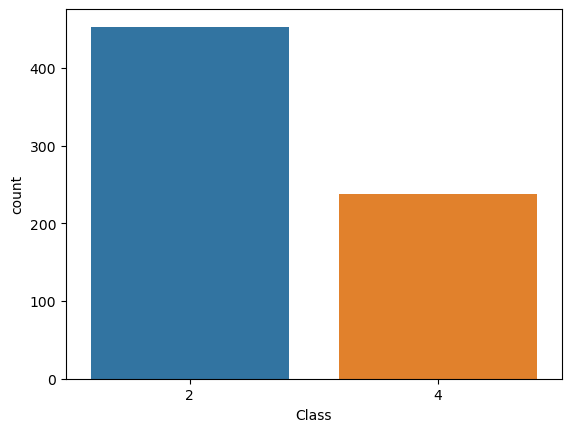

In [27]:
plot_class(data)

---
**<h4>Question 4:** Create a function that displays the correlation between different features.</h4>

---

- Write a function  plot_corr() function to create a heatmap of size (10, 7).

- Use .corr() function to find the correlation between the features in the data.

- Use seaborn heatmap function to plot the following.

In [28]:
def plot_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot = True, cmap = 'OrRd')

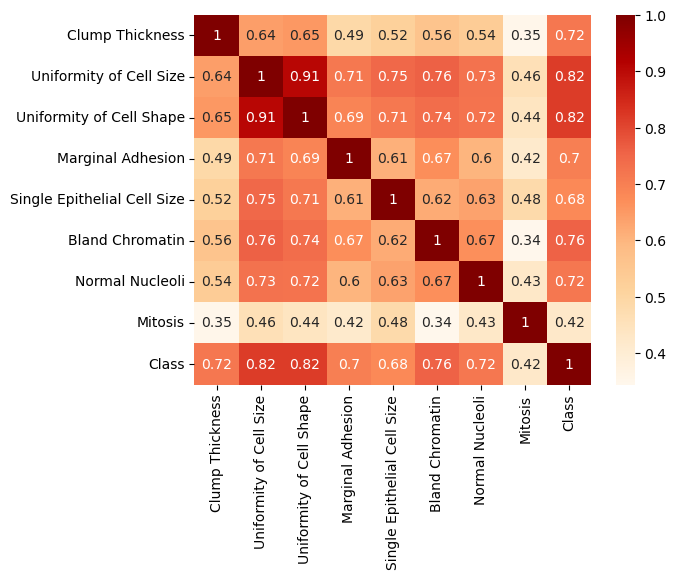

In [29]:
plot_corr(data)

In [30]:
correlation = data.corr()['Class'].abs().sort_values(ascending = False)
correlation

Class                          1.000000
Uniformity of Cell Size        0.817720
Uniformity of Cell Shape       0.817693
Bland Chromatin                0.756618
Clump Thickness                0.716938
Normal Nucleoli                0.715540
Marginal Adhesion              0.701371
Single Epithelial Cell Size    0.681233
Mitosis                        0.424111
Name: Class, dtype: float64

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---


---
**<h4>Question 5:** Prepare the  data according to the following model requirements.</h4>

---

- **Split** the data into **80:20** inside train_test_split.

- Make sure to set the **random_state = 42**.


In [31]:
def split(data):
    X = data.drop('Class', axis = 1)
    y = data['Class']
    return [X, y]

def data_prep(data):
    X = data.drop('Class', axis = 1)
    y = data['Class']
    return train_test_split(X, y, test_size = 0.20, random_state = 42)

In [32]:
X_train, X_test, y_train, y_test = data_prep(data)
X, y = split(data)

In [33]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [34]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 110 to 102
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              552 non-null    int64 
 1   Uniformity of Cell Size      552 non-null    int64 
 2   Uniformity of Cell Shape     552 non-null    int64 
 3   Marginal Adhesion            552 non-null    int64 
 4   Single Epithelial Cell Size  552 non-null    int64 
 5   Bare Nuclei                  552 non-null    object
 6   Bland Chromatin              552 non-null    int64 
 7   Normal Nucleoli              552 non-null    int64 
 8   Mitosis                      552 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 43.1+ KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 386 to 650
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              139 non-null    int64 
 1   Uniformity of Cell Size      139 non-null    int64 
 2   Uniformity of Cell Shape     139 non-null    int64 
 3   Marginal Adhesion            139 non-null    int64 
 4   Single Epithelial Cell Size  139 non-null    int64 
 5   Bare Nuclei                  139 non-null    object
 6   Bland Chromatin              139 non-null    int64 
 7   Normal Nucleoli              139 non-null    int64 
 8   Mitosis                      139 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 10.9+ KB


In [37]:
y_train.head(), y_test.head()

(110    2
 82     2
 51     4
 219    2
 575    2
 Name: Class, dtype: int64,
 386    4
 682    2
 261    4
 344    4
 324    2
 Name: Class, dtype: int64)

In [38]:
pd.DataFrame(y).value_counts()

Class
2        453
4        238
dtype: int64

---
**<h4>Question 6:** Create a function to normalize the data.</h4>

---

- Using the StandardScaler() function  transform the data in suitable format for the model.


In [39]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_n = scaler.fit_transform(X_train)
    X_test_n = scaler.transform(X_test)
    X_train_df = pd.DataFrame(X_train_n, index = X_train.index, columns = X_train.columns)
    X_test_df = pd.DataFrame(X_test_n, index = X_test.index, columns = X_test.columns)
    return X_train_df, X_test

In [40]:
X_train, X_test = scale_data(X_train,X_test)
X_train.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis
110,-1.247834,-0.070304,-0.757536,-0.308891,-0.571893,-0.413078,0.612085,0.016845,0.211714
82,0.165823,-0.393703,-0.757536,-0.654750,-0.571893,-0.685502,-0.193328,-0.624414,-0.355598
51,0.165823,-0.070304,-0.098498,0.382825,-0.571893,0.131770,-0.193328,0.337474,-0.355598
219,0.519237,-0.717102,-0.098498,-0.654750,-0.571893,-0.685502,-0.193328,-0.624414,-0.355598
575,0.165823,-0.717102,-0.428017,-0.654750,-0.571893,-0.685502,-0.193328,-0.624414,-0.355598


In [41]:
X_test.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitosis
386,7,6,6,3,2,10,7,1,1
682,5,1,1,1,2,1,3,2,1
261,5,10,10,6,10,10,10,6,5
344,7,6,4,8,10,10,9,5,3
324,1,1,1,1,2,1,3,1,1


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, we will develop different **ensemble methods**.

- Then we will **analyze the results** obtained and **make our observation**.

- For **evaluation purposes** we will **focus** on the **accuracy score**.

- **Remember** that we want to **generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 7:** Create a function to  instantiate a bagging classifier  with the following settings.</h4>

---

- You have to use the hyperparameters setting of the model as following:
  - `base_estimator` = Logistic Regression
  - `n_neghbors` = 500 and
  - `random_state` = 42


In [42]:
def bagging():
    base_class = LogisticRegression()
    bagClf = BaggingClassifier(base_estimator = base_class,
                             n_estimators = 500,
                             random_state = 42)
    return bagClf

---
**<h4>Question 8:** Create a function to instantiate a random forest classifier with the following settings.</h4>

---

- You have to use the hyperparameters setting of the model as following:
  - `n_neghbors` = 100,

  - `random_state` = 42,

  - `class_weight` = 'balanced'

In [43]:
def random_forest():
    rfm = RandomForestClassifier(n_estimators = 100,
                                class_weight = 'balanced',
                                random_state = 42)
    return rfm

---
**<h4>Question 9:** Create a function to  instantiate an AdaBoost classifier with the following settings.</h4>

---

- You have to use the hyperparameters setting of the model as following:
  - `n_neghbors` = 70

  - `random_state` = 42 

In [44]:
def adaBoost():
    abm = AdaBoostClassifier(n_estimators = 70,
                            random_state = 42)
    return abm

---
**<h4>Question 10:** Create a function to perform an ensemble model using Voting Classifier.</h4>

---
- You can use different model like "LogisticRegression", "DecisionTreeClassifier", "SVC" to create a voting classifier.

In [45]:
def votingClass():
    bagClf = bagging()
    rfm = random_forest()
    abm = adaBoost()
    classifiers = [('Bagging Classifier', bagClf), ('Random Forest', rfm), ('Ada Boost', abm)]
    Vm = VotingClassifier(estimators = classifiers)
    return Vm

---
**<h4>Question 11:** Create a function to predict accuracy score in both train and test dataset using different models.</h4>

---
- Create a list with different functions and use a for-loop to predict accuracy on train and test set.

- Store the result of train and test scores in separate lists. 

In [46]:
clf_names = [bagging, random_forest, adaBoost, votingClass]

In [47]:
def predict_scores():
    classifiers = [bagging(), random_forest(), adaBoost(), votingClass()]
    clf_names = ['Bagging', 'Random Forest', 'AdaBoost', 'Voting']
    train_scores = []
    test_scores = []
    for item in classifiers:
        item.fit(X_train, y_train)
        acc_pred_test = accuracy_score(y_test, item.predict(X_test))
        acc_pred_train = accuracy_score(y_train, item.predict(X_train))
        test_scores.append(round(100*acc_pred_test, 4))
        train_scores.append(round(100*acc_pred_train, 4))
    return train_scores, test_scores, clf_names

In [48]:
train_scores, test_scores, clf_names = predict_scores()

In [49]:
acc_scores_df = pd.DataFrame({'Classifier' : clf_names,
                             'Train Scores' : train_scores,
                             'Test scores' : test_scores})
print(acc_scores_df)

      Classifier  Train Scores  Test scores
0        Bagging       96.9203      29.4964
1  Random Forest      100.0000      29.4964
2       AdaBoost       99.8188      29.4964
3         Voting       99.8188      29.4964


---
**<h4>Question 12:** Complete the following function to initiate a dataframe with the scores of different models.</h4>

---

- Using the pandas **DataFrame** method create a data frame to compare the accuracy score of different models.

- Use the **transpose** method to make the data frame more readable.

In [50]:
def create_frame(acc_scores_df):
    accuracy_frame = acc_scores_df.transpose()
    return accuracy_frame

In [51]:
acc_scores_df_t = create_frame(acc_scores_df)

In [52]:
acc_scores_df_t

,0,1,2,3
Classifier,Bagging,Random Forest,AdaBoost,Voting
Train Scores,96.9203,100.0,99.8188,99.8188
Test scores,29.4964,29.4964,29.4964,29.4964


---
**<h4>Question 13:** Create a function to stack different models to create a stacking classifier.</h4>

---

- Use StackingClassifier from **mlxtend** to create the model.

- Build stacking classifier using **KNN**, **RadomForest** and **Naive Bayes**, use **LogisticRegression** as meta_classifier.

- Use cross validation score to predict on the entire dataset with following parameters:
  - `estimator` : clf (stacked models)
  - `X` : X
  - `y` : y
  - `cv` : 3
  - `scoring` : 'accuracy'

- Note that use the whole dataset.

- Print accuracy for different models with the model name.


In [59]:
def stacking_clf(X, y):
    model_knn = KNeighborsClassifier()
    model_nb = GaussianNB()
    model_logreg = LogisticRegression()
    model_rf = random_forest()
    clf_stack = StackingClassifier(classifiers=[model_knn, model_nb, model_rf],
                                   meta_classifier = model_logreg,
                                   use_probas = True,
                                   use_features_in_secondary = True)
    model_stack = clf_stack.fit(X_train, y_train)
    pred_stack = model_stack.predict(X_test)
    acc_stack = accuracy_score(y_test, pred_stack)
    print('Test accuracy score of Stacked model:', round(acc_stack, 6) * 100)

In [60]:
stacking_clf(X, y)

Test accuracy score of Stacked model: 29.4964


<a name = Section9></a>

---
# **9. Conclusion**
---
